In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

[(521, 243), (900, 605), (1272, 994), (1648, 1361)]
0
1
2
3


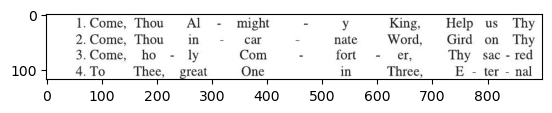


0
1
2
3


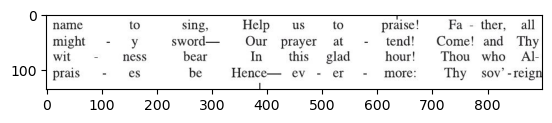


0
1
2
3


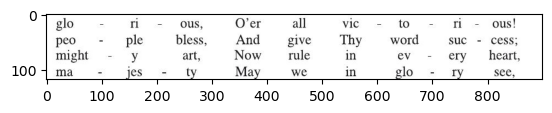


0
1
2
3


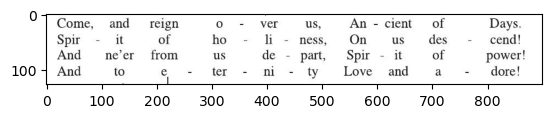

In [394]:
# assume an input list 
#always start from 0 and ends with 1100
# spacing = [520, 770, 900]
paragraphNum = 4

# Step1: Read image, to grayscale, edge detection
# Read image
image = cv2.imread('source/page_14.jpg')
image = cv2.resize(image, (1200,1800))
 
# Convert image to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
 
# Use canny edge detection
edges = cv2.Canny(gray,50,150,apertureSize=3)
 
# Step2: HoughLinesP, save line in lines

lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=200, # Min number of votes for valid line
            minLineLength=100, # Min allowed length of line
            maxLineGap=3 # Max allowed gap between line for joining them
            )

# if lines is not None:
#     for i in range(0, len(lines)):
#         l = lines[i][0]
#         cv2.line(image, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

# plt.imshow(image)
# plt.show()

# Step3: Extract line from lines

leftParapheLine = set()
for point in lines:
    # Extracted points nested in the list
    x1, y1, x2, y2 = point[0]
    #x is about 105
    if x1<90 or x1>115 or x2<90 or x2>115 or abs(y1 - y2) < 10:
        continue
#     print(x1)
    newLine = True
    if len(leftParapheLine) == 0:
        leftParapheLine.add((y1, y2))
    else:
        # check if it can merge
        for p in leftParapheLine:
            # same line detected
            # case1: former line in new line
            if (p[0] > y2 - 10 and p[0] < y1 + 10) or (p[1] > y2 - 10 and p[1] < y1 + 10) \
                    or (y1 < p[0] + 10 and y1 > p[1] - 10) or (y2 < p[0] + 10 and y2 > p[1] - 10):
                p = (max(y1, p[0]), min(y2, p[1]))
                newLine = False
        if newLine:
            leftParapheLine.add((y1, y2))

leftParapheLine = sorted(leftParapheLine)
print(leftParapheLine)
# for point in points:
#     cv2.line(image,(105,point[1]),(105,point[0]),(0,255,0),2)
# plt.imshow(image)
# plt.show()


# Step4: Fragment image 
# Step4: Extract text

#crop example(not finish yet)
xStart = 180
xWinLen = 900
yUpMargin = 75
yLowMargin = 85
crop = 0

textArr = [""] * paragraphNum

cnt = 0

stop = 0
for line in leftParapheLine:
#     if(stop==1):
#         continue
#     stop=1
#     for i in range(paragraphNum):
#         start = 0
#         end = 0
#         if(i==0):
#             start=0
#             end=spacing[0]
#         elif(i== paragraphNum-1):
#             start=spacing[i]
#             end=1100
#         else:
#             start=spacing[i-1]
#             end=spacing[i]

        #crop img 
    crop = image[line[1]+yUpMargin:line[0]-yLowMargin, xStart:xStart+xWinLen]
    
    rawData = pytesseract.image_to_string(crop)
    lines = rawData.split("\n")
    
    
    for line in lines:
        
        if(len(line)<5):
            continue
        print(cnt)
        textArr[cnt]+=line
        cnt = cnt + 1
        cnt = cnt % paragraphNum

    
    
    
    
    plt.imshow(crop)
    plt.show()
    print()



In [368]:
textArr[4]+"hahh"

IndexError: list index out of range

In [385]:
leftParapheLine

[(521, 243), (900, 605), (1272, 994), (1648, 1361)]

In [395]:
for i in textArr:
    print(i)
    print("\n\n")

1.Come, Thou Al - might - y King, Help us Thyname to sing, Help us to praise! Fa - ther, allri - ous!Come, and reign Oo -. ver us, An - cient of Days.



2. Come, Thou in - car - nate Word, Gird on Thymight - y sword— Our prayer at - tend! Come! and Thysuc - cess;Spir - it of ho - li - ness, On us des -  cend!



3.Come, ho - ly Com - fort - er, Thy sac - redwit - ness bear In this glad hour! Thou who AI-ery heart.And ne’er_ from us de - part, Spir - it of power!



4.To Thee, great One in Three, E - ter - nalprais - es be Hence— ev - er - more: Thy  sov’ -reignry see,And to e - ter - mi - ty Love and a -  dore!





In [382]:
textArr

['ri - ous!', 'suc - cess;', 'ery heart.', 'ry see,']

In [353]:
paragraphNum

4

In [355]:
rawData

'name to sing, Help us to praise! Fa - ther, all\nmight - y sword— Our prayer at - tend! Come! and Thy\nwit - ness bear In this glad hour! Thou who AI-\n\nprais - es be Hence— ev - er - more: Thy sov’ -reign\n1\n'

In [347]:
type(rawData)

str

In [356]:
len(leftParapheLine)

4

In [296]:
lines = cv2.HoughLinesP(
            crop, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=5, # Min number of votes for valid line
            minLineLength=2, # Min allowed length of line
            maxLineGap=30 # Max allowed gap between line for joining them
            )
print(len(lines))

error: OpenCV(4.8.1) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/hough.cpp:485: error: (-215:Assertion failed) image.type() == CV_8UC1 in function 'HoughLinesProbabilistic'


In [199]:
len(lines)

177

In [219]:
if lines is not None:
    for i in range(0, len(lines)):
        l = lines[i][0]
        cv2.line(image, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

plt.imshow(image)
plt.show()

In [220]:
print(cnt)
print(list)

1
[[(34, 35), (36, 32)]]


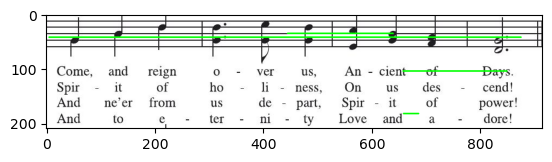

In [295]:
plt.imshow(crop)
plt.show()

In [113]:
lines

array([[[397,  27, 879,  27]],

       [[386,  18, 914,  18]],

       [[541,  16, 747,  16]],

       [[291,  50, 524,  50]],

       [[464,  42, 731,  42]],

       [[747,  65, 914,  65]],

       [[748,  63, 862,  63]],

       [[284,  65, 637,  65]],

       [[173,  16, 274,  16]],

       [[538,  50, 736,  50]]], dtype=int32)

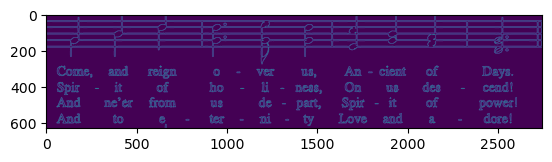

In [236]:
resized = cv2.resize(crop, (3*crop.shape[1], 3*crop.shape[0]))
# Convert image to grayscale
gray = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
 
# Use canny edge detection
edges = cv2.Canny(gray,50,150,apertureSize=3)
plt.imshow(edges)
plt.show()

In [281]:
lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=1, # Min number of votes for valid line
            minLineLength=20, # Min allowed length of line
            maxLineGap=1 # Max allowed gap between line for joining them
            )
print(len(lines))

224


In [285]:
cnt = 0
list = []
for points in lines:
    if abs(y1-y2)>3: 
#     if abs(x1-x2)>500 or abs(y1-y2)<3: 
        continue
    cnt = cnt+1
    list.append([(x1,x2),(y1,y2)])
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(crop,(x1,y1),(x2,y2),(0,255,0),2)


In [286]:
len(list)

10

In [287]:
lines

array([[[2555,  146, 2674,  146]],

       [[ 445,   35,  640,   35]],

       [[1236,  140, 1430,  140]],

       [[ 707,   42,  852,   42]],

       [[2529,   68, 2710,   68]],

       [[ 658,  104,  850,  104]],

       [[2172,  176, 2313,  176]],

       [[1589,  110, 1665,  110]],

       [[ 659,  182,  687,  182]],

       [[1436,  233, 1436,  206]],

       [[2441,   35, 2474,   35]],

       [[2259,   35, 2315,   35]],

       [[2021,   74, 2077,   74]],

       [[  61,  146,  117,  146]],

       [[   7,   41,   34,   41]],

       [[  32,  182,   88,  182]],

       [[2388,  104, 2444,  104]],

       [[1222,   36, 1261,   36]],

       [[1626,  140, 1654,  140]],

       [[2013,  140, 2041,  140]],

       [[1262,   42, 1297,   42]],

       [[2664,  140, 2710,  140]],

       [[2266,  110, 2322,  110]],

       [[  11,   68,   64,   68]],

       [[ 682,   68,  726,   68]],

       [[ 497,   74,  553,   74]],

       [[2410,  182, 2466,  182]],

       [[ 421,  146,  452,  

In [88]:
import pytesseract
text = ""
text += pytesseract.image_to_string(crop)

In [105]:
text

'name to sing, Help us to praise! Fa - ther, all\n\nmight - y sword— Our prayer at - tend! Come! and Thy\n\nwit - mess bear Ta this glad hour! Thou who Al-\n\nprais - eg be Hence—- ev - er - more: Thy sov’ -reign\nf\n\n'

In [98]:
crop = image[line[1]+yUpMargin:line[0]-yLowMargin, xStart:xStart+xWinLen]

In [ ]:
image = cv2.imread('source/page_14.jpg')

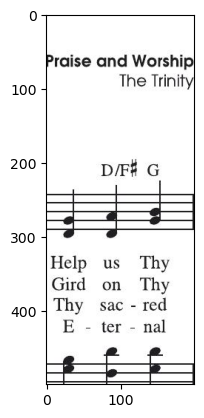

In [332]:
crop = image[:500, 900 : 1100]
plt.imshow(crop)
plt.show()